# LAB1 - Regresja

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl


_wersja dokumentu uzupełniana przez studenta_

# Wprowadzenie

Regresja liniowa w modelowaniu statystycznym odnosi się do metod opartych o liniowe kombinacje zmiennych i parametrów dopasowujących model do danych. Dopasowana linia lub krzywa regresji reprezentuje oszacowaną wartość oczekiwaną zmiennej y przy konkretnych wartościach innej zmiennej lub zmiennych x. W najprostszym przypadku dopasowana jest stała lub funkcja liniowa.

Celem zajęć jest identyfikacja modelu regresji dla problemu czasu obliczeń złożonych operacji matematycznych na CPU. Czas obliczeń zależy głównie od mocy obliczeniowej procesora.

Środowisko pracy: Anaconda, Jupyter Notebook

Narzędzia: Scikit Learn, Python

# Regresja - przykład

Sposób identyfikacji modelu regresji z wykorzystaniem narzędzi programistycznych przedstawia przykład dla danych dotyczacych cukrzycy:

https://archive.ics.uci.edu/ml/datasets/diabetes

```
Source:

Michael Kahn, MD, PhD, Washington University, St. Louis, MO

Data Set Information:

Diabetes patient records were obtained from two sources: an automatic electronic recording device and paper records. The automatic device had an internal clock to timestamp events, whereas the paper records only provided "logical time" slots (breakfast, lunch, dinner, bedtime). For paper records, fixed times were assigned to breakfast (08:00), lunch (12:00), dinner (18:00), and bedtime (22:00). Thus paper records have fictitious uniform recording times whereas electronic records have more realistic time stamps.

Diabetes files consist of four fields per record. Each field is separated by a tab and each record is separated by a newline.

File Names and format:
 * (1) Date in MM-DD-YYYY format
 * (2) Time in XX:YY format
 * (3) Code
 * (4) Value


The Code field is deciphered as follows:
 * 33 = Regular insulin dose
 * 34 = NPH insulin dose
 * 35 = UltraLente insulin dose
 * 48 = Unspecified blood glucose measurement
 * 57 = Unspecified blood glucose measurement
 * 58 = Pre-breakfast blood glucose measurement
 * 59 = Post-breakfast blood glucose measurement
 * 60 = Pre-lunch blood glucose measurement
 * 61 = Post-lunch blood glucose measurement
 * 62 = Pre-supper blood glucose measurement
 * 63 = Post-supper blood glucose measurement
 * 64 = Pre-snack blood glucose measurement
 * 65 = Hypoglycemic symptoms
 * 66 = Typical meal ingestion
 * 67 = More-than-usual meal ingestion
 * 68 = Less-than-usual meal ingestion
 * 69 = Typical exercise activity
 * 70 = More-than-usual exercise activity
 * 71 = Less-than-usual exercise activity
 * 72 = Unspecified special event
```

W przykładzie zastosowano pierwszą cechę zestawu danych dotyczących cukrzycy, aby zilustrować metodę regresji. Końcowy wykres zawierał będzie zarówno dane źródłowe jak i wykres funkcji liniowej zidentyfikowanej za pomocą regresji. Funkcja liniowa przedstawia zależność pomiędzy danymi wejściowymi a wyjściowymi minimalizując sumę kwadratów pomiędzy poszczególnymi parami punktów.


Obliczane są również współczynniki oraz błąd modelu.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [18]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [20]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616113
Mean squared error: 2548.07
Variance score: 0.47


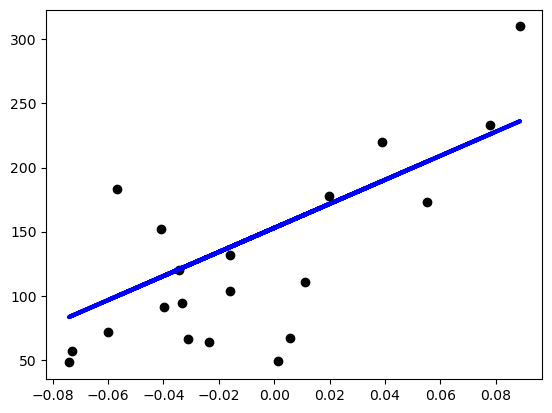

In [21]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

## Regresja - przewidywanie czasu wykonania operacji

W systemie komputerowym istnieją dwa procesy obliczeniowe: io\_heavy oraz cpu\_heavy charakteryzujące się tym, że w pierszym przypadku czas wykonania jest głównie zależny od dostępu do urządzeń IO, a w drugim przypadku od szybkości procesora.

In [22]:
import random
import string
import time

def io_heavy(text):
    f = open('temp_file.txt', 'wt', encoding='utf-8')
    f.write(text)
    f.close()
    return

def cpu_heavy(n):
    start = time.time()
    count = 0
    for i in range(n):
        count += i
    stop = time.time()
    return

def run_series_cpu(n, iterations):
    start = time.time()
    for i in range(iterations):
        cpu_heavy(n)
    stop = time.time()
    
    return stop - start

def run_series(text_size, iterations):
    TEXT = ''.join(random.choice(string.ascii_lowercase) for i in range(text_size))
    
    start = time.time()
    for i in range(iterations):
        io_heavy(TEXT)
    stop = time.time()
    
    return stop - start

Czas obliczeń operacji jest ściśle zależny od mocy obliczeniowej komputera, na którym są one wykonywane.

**TODO** _Opisz specyfikację komputera na którym prowadzone są testy._  -> Procesor: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz 2.42 GHzs. Typ systemu: 64-bitowy system operacyjny, procesor x64 Pamięć RAM: 16 GB

Uzupełnij poniższy kod tak by zebrać czasy wykonania operacji *cpu\_heavy* dla różnych n. Wyniki powinny być zapisane w tablicach *training_x* oraz *training_y*.

Korzystamy z funkcji *run\_series\_cpu(n)*.

TRAINING_N - ilość danych uczących; długość tablic *training_x* oraz *training_y*.


In [23]:
CPU_MAX_N = 1000000

TRAINING_N = 50

training_X = []
training_y = []

for i in range(TRAINING_N):
    CPU_N = random.randrange(CPU_MAX_N)
    training_X.append(CPU_N)
    training_y.append(run_series_cpu(CPU_N, 10))

Przedstaw wykres zależności pomiędzy ilością iteracji obliczeń a czasem wykonania operacji *run\_series\_cpu*.

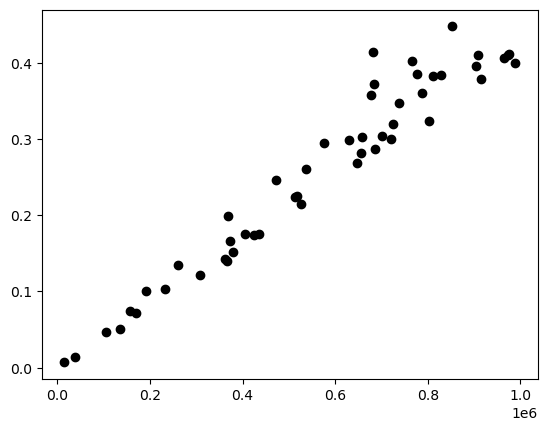

In [24]:
plt.scatter(training_X,training_y, color='black')
plt.show()

Naucz model regresji na danych treningowych.

In [25]:
regr = linear_model.LinearRegression()
training_X=np.array(training_X).reshape(-1, 1)
training_y=np.array(training_y).reshape(-1, 1)
training_X
# training_y
regr.fit(training_X, training_y)


LinearRegression()

Wypisz szczegóły nauczonego modelu regresji, a następnie przedstaw na wykresie zidentyfikowana funkcję liniową odzwierciedlającą zależności w danych.

Coefficients: 
 [[4.50090256e-07]]
Intercept: 
 [0.00249205]
Mean squared error: 0.00
Variance score: 0.94


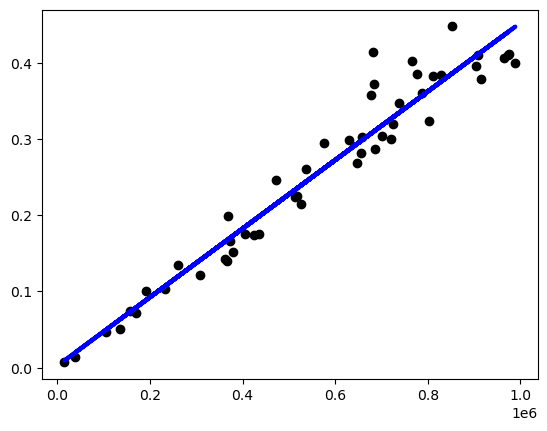

In [26]:
# Make predictions using the testing set
training_y_pred = regr.predict(training_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(training_y, training_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(training_y, training_y_pred))


plt.scatter(training_X, training_y,  color='black')
plt.plot(training_X, training_y_pred, color='blue', linewidth=3)
plt.show()

Na podstawie opracowanego modelu zaimplementuj funkcję szacującą czas działania procesu *cpu intensive*.

In [27]:
#testing data

def run_series_cpu_predicted_time(n):
    return regr.predict([[n]])

run_series_cpu_predicted_time(100)


array([[0.00253705]])

Na podstawie współczynników _coef_ oraz _intercept_  z wyuczonego modelu przedstaw funkcję matematyczną szacującą czas działania procesu *cpu intensive*.

Przydatne informacje: https://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [28]:
coef = regr.coef_[0][0]
intercept = regr.intercept_[0]

print('Coefficient: \n', coef)
print('Intercept: \n', intercept)

Coefficient: 
 4.5009025576706573e-07
Intercept: 
 0.00249204542275161


**TODO** Uzupełnij funkcję

predicted_time(n) = ... + ...  * n

In [29]:
def run_series_cpu_predicted_time_linear_function(n):
    return coef *n + intercept

Wykonaj poniższe operacje i porównaj wyniki.

In [30]:
print("Test 1: ",run_series_cpu(4032003,10)," Predicted:", run_series_cpu_predicted_time(4032003)," Predicted2:", run_series_cpu_predicted_time_linear_function(4032003))
print("Test 2: ",run_series_cpu(54300,10)," Predicted:", run_series_cpu_predicted_time(54300)," Predicted2:", run_series_cpu_predicted_time_linear_function(54300))
print("Test 3: ",run_series_cpu(765403,10)," Predicted:", run_series_cpu_predicted_time(765403)," Predicted2:", run_series_cpu_predicted_time_linear_function(765403))
print("Test 4: ",run_series_cpu(84673,10)," Predicted:", run_series_cpu_predicted_time(84673)," Predicted2:", run_series_cpu_predicted_time_linear_function(84673))
print("Test 5: ",run_series_cpu(5436574,10)," Predicted:", run_series_cpu_predicted_time(5436574)," Predicted2:", run_series_cpu_predicted_time_linear_function(5436574))


Test 1:  1.8988556861877441  Predicted: [[1.81725731]]  Predicted2: 1.817257306946328
Test 2:  0.0227816104888916  Predicted: [[0.02693195]]  Predicted2: 0.02693194631090328
Test 3:  0.4603886604309082  Predicted: [[0.34699248]]  Predicted2: 0.346992477457631
Test 4:  0.030974388122558594  Predicted: [[0.04060254]]  Predicted2: 0.040602537649316366
Test 5:  2.3888158798217773  Predicted: [[2.44944103]]  Predicted2: 2.449441027579331


Uzyskane wyniki są bliskie rzeczywistym (występują niewielkie różnice)


# Przydatne źródła

https://github.com/bfortuner/ml-study/blob/master/multitasking_python.ipynb